##   Credit Risk Analysis Using Classification Technique

## Overview

A short primer of underwriting in the credit industry - 
In general, whenever an individual/corporation applies for a loan from a bank (or any loan issuer), their credit history undergoes a rigorous check to ensure that whether they are capable enough to pay off the loan (in this industry it is referred to as credit-worthiness).

The issuers have a set of model/s and rule/s in place which take information regarding their current financial standing, previous credit history and some other variables as input and output a metric which gives a measure of the risk that the issuer will potentially take on issuing the loan. The measure is generally in the form of a probability and is the risk that the person will default on their loan (called the probability of default) in the future.

Based on the amount of risk that the issuer is willing to take (plus some other factors) they decide on a cutoff of that score and use it to take a decision regarding whether to pass the loan or not. This is a way of managing credit risk. The whole process collectively is referred to as underwriting.


Overview of the problem
In this project you will have to put yourself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.

In [0]:
#Used Google Colab for the Project. This is the code for mounting file from the google drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 1. Import Packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

# 2. Load data

In [172]:
data_org = pd.read_csv("/content/drive/My Drive/Data Sets/XYZCorp_LendingData.csv",sep = "\t")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
credit_risk = data_org.copy()

In [0]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)

In [0]:
credit_risk = credit_risk.reindex(sorted(credit_risk.columns), axis = 1)

# 3. Data Preparation

In [176]:
credit_risk.head()

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,default_ind,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,term,title,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status,verification_status_joint,zip_code
0,0.0,AZ,NaN,24000.0,NaN,INDIVIDUAL,0.00,0.0,0,0.0,Borrower added on 12/22/11 > I need to upgra...,27.65,NaN,Jan-1985,10+ years,NaN,5000.0,4975.0,B,RENT,1077501,NaN,f,NaN,NaN,1.0,162.87,10.65,Dec-2011,Jan-2016,171.62,Jan-2015,5000.0,NaN,1296599,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,credit_card,n,0.00,13648.0,83.7,B2,36 months,Computer,NaN,NaN,9.0,NaN,NaN,5861.071414,5831.78,861.07,0.00,5000.00,NaN,Verified,NaN,860xx
1,0.0,GA,NaN,30000.0,NaN,INDIVIDUAL,1.11,0.0,1,0.0,Borrower added on 12/22/11 > I plan to use t...,1.00,NaN,Apr-1999,< 1 year,Ryder,2500.0,2500.0,C,RENT,1077430,NaN,f,NaN,NaN,5.0,59.83,15.27,Dec-2011,Sep-2013,119.66,Apr-2013,2500.0,NaN,1314167,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,car,n,117.08,1687.0,9.4,C4,60 months,bike,NaN,NaN,4.0,NaN,NaN,1008.710000,1008.71,435.17,0.00,456.46,NaN,Source Verified,NaN,309xx
2,0.0,IL,NaN,12252.0,NaN,INDIVIDUAL,0.00,0.0,0,0.0,NaN,8.72,NaN,Nov-2001,10+ years,NaN,2400.0,2400.0,C,RENT,1077175,NaN,f,NaN,NaN,2.0,84.33,15.96,Dec-2011,Jan-2016,649.91,Jun-2014,2400.0,NaN,1313524,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,small_business,n,0.00,2956.0,98.5,C5,36 months,real estate business,NaN,NaN,10.0,NaN,NaN,3003.653644,3003.65,603.65,0.00,2400.00,NaN,Not Verified,NaN,606xx
3,0.0,CA,NaN,49200.0,NaN,INDIVIDUAL,0.00,0.0,0,0.0,Borrower added on 12/21/11 > to pay for prop...,20.00,NaN,Feb-1996,10+ years,AIR RESOURCES BOARD,10000.0,10000.0,C,RENT,1076863,NaN,f,NaN,NaN,1.0,339.31,13.49,Dec-2011,Jan-2015,357.48,Jan-2015,10000.0,NaN,1277178,35.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,other,n,0.00,5598.0,21.0,C1,36 months,personel,NaN,NaN,37.0,NaN,NaN,12226.302212,12226.30,2209.33,16.97,10000.00,NaN,Source Verified,NaN,917xx
4,0.0,OR,NaN,80000.0,NaN,INDIVIDUAL,0.00,0.0,0,0.0,Borrower added on 12/21/11 > I plan on combi...,17.94,NaN,Jan-1996,1 year,University Medical Group,3000.0,3000.0,B,RENT,1075358,NaN,f,NaN,NaN,0.0,67.79,12.69,Dec-2011,Jan-2016,67.79,Jan-2016,3000.0,NaN,1311748,38.0,NaN,NaN,NaN,Feb-2016,15.0,NaN,NaN,NaN,NaN,NaN,NaN,766.9,766.9,1.0,0.0,other,n,0.00,27783.0,53.9,B5,60 months,Personal,NaN,NaN,38.0,NaN,NaN,3242.170000,3242.17,1009.07,0.00,2233.10,NaN,Source Verified,NaN,972xx


In [177]:
credit_risk.shape

(855969, 73)

In [178]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
acc_now_delinq                 855969 non-null float64
addr_state                     855969 non-null object
all_util                       13288 non-null float64
annual_inc                     855969 non-null float64
annual_inc_joint               442 non-null float64
application_type               855969 non-null object
collection_recovery_fee        855969 non-null float64
collections_12_mths_ex_med     855913 non-null float64
default_ind                    855969 non-null int64
delinq_2yrs                    855969 non-null float64
desc                           121812 non-null object
dti                            855969 non-null float64
dti_joint                      440 non-null float64
earliest_cr_line               855969 non-null object
emp_length                     812908 non-null object
emp_title                      806526 non-null object
funded_amnt             

In [179]:
credit_risk.describe()

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,default_ind,delinq_2yrs,dti,dti_joint,funded_amnt,funded_amnt_inv,id,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim
count,855969.000000,13288.000000,8.559690e+05,442.000000,855969.000000,855913.000000,855969.000000,855969.000000,855969.000000,440.000000,855969.000000,855969.000000,8.559690e+05,11609.000000,13288.000000,13288.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,13288.000000,8.559690e+05,416157.000000,213139.000000,131184.000000,12934.000000,855969.000000,13288.000000,13288.000000,13288.000000,13288.000000,13288.000000,13288.000000,855969.000000,855969.000000,855969.0,855969.000000,855969.000000,8.559690e+05,855523.000000,7.886560e+05,7.886560e+05,855969.000000,13288.000000,13288.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,7.886560e+05
mean,0.004944,61.024526,7.507119e+04,107412.163982,4.951227,0.014230,0.054286,0.311621,18.122165,18.318477,14732.378305,14700.061226,3.224073e+07,71.486993,0.947772,1.841963,0.680915,436.238072,13.192320,2225.985295,14745.571335,5840.443332,3.476269e+07,34.149943,44.101450,70.463959,20.833153,11.542447,1.072998,0.749323,1.666767,2.945665,1.354305,2.945515,8284.830230,8281.449347,1.0,0.194537,47.089499,1.691053e+04,55.019405,2.254129e+02,1.397662e+05,25.269269,36511.541391,1.524232,7653.296336,7622.22052,1755.046221,0.319530,5850.841088,3.216357e+04
std,0.077333,20.018117,6.426447e+04,47987.608637,62.478569,0.133712,0.226581,0.857189,17.423629,7.221855,8419.471653,8425.805478,2.271969e+07,23.015293,1.441667,2.975049,0.964033,243.726876,4.368365,4864.966593,8425.340005,5108.500262,2.399418e+07,21.868500,22.164907,27.827120,26.739237,5.308094,1.206939,0.986169,1.685394,3.080330,1.483710,2.595313,8461.946669,8458.496422,0.0,0.581585,413.136043,2.222374e+04,23.811585,1.048945e+04,1.539385e+05,11.818841,42492.757796,2.697601,7909.383591,7885.15640,2081.692980,3.609399,6676.410888,3.769964e+04
min,0.000000,0.000000,0.000000e+00,17950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.050000,500.000000,0.000000,5.473400e+04,0.000000,0.000000,-4.000000,0.000000,15.690000,5.320000,0.000000,500.000000,0.000000,7.069900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,47.900000,4.500000e+04,75000.250000,0.000000,0.000000,0.000000,0.000000,11.880000,13.187500,8000.000000,8000.000000,9.067986e+06,58.500000,0.000000,0.000000,0.000000,260.550000,9.990000,285.420000,8000.000000,2405.000000,1.079273e+07,15.000000,27.000000,51.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,6.469000e+03,37.600000,0.000000e+00,2.987000e+04,17.000000,10390.250000,0.000000,1969.690000,1960.12000,451.270000,0.000000,1239.950000,1.400000e+04
50%,0.000000,62.100000,6.500000e+04,100000.000000,0.000000,0.000000,0.000000,0.000000,17.610000,17.735000,13000.000000,13000.000000,3.431355e+07,75.000000,0.000000,2.000000,0.000000,382.550000,12.990000,468.820000,13000.000000,4485.500000,3.697532e+07,31.000000,44.000000,70.000000,12.000000,11.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,6290.250000,6287.650000,1.0,0.000000,0.000000,1.190300e+04,55.900000,0.000000e+00,8.100850e+04,24.000000,24959

In [180]:
credit_risk.describe(include = "object")

,addr_state,application_type,desc,earliest_cr_line,emp_length,emp_title,grade,home_ownership,initial_list_status,issue_d,last_credit_pull_d,last_pymnt_d,next_pymnt_d,purpose,pymnt_plan,sub_grade,term,title,verification_status,verification_status_joint,zip_code
count,855969,855969,121812,855969,812908,806526,855969,855969,855969,855969,855919,847107,602998,855969,855969,855969,855969,855936,855969,442,855969
unique,51,2,120335,697,11,290912,7,6,2,103,102,97,3,14,2,35,2,60991,3,3,931
top,CA,INDIVIDUAL,,Aug-2001,10+ years,Teacher,B,MORTGAGE,f,Oct-2015,Jan-2016,Jan-2016,Feb-2016,debt_consolidation,n,B3,36 months,Debt consolidation,Source Verified,Not Verified,945xx
freq,125172,855527,231,6433,282090,12965,247998,429106,442555,48212,701687,467510,534094,505392,855964,54958,600221,398089,318178,252,9466


In [181]:
# checking the count of target column
credit_risk.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

# Analysis of NAs

In [182]:
print(credit_risk.isnull().sum().sort_values(ascending = False),"\n\n")
print(credit_risk.isnull().sum().sort_values(ascending = False)/len(credit_risk)*100)

dti_joint                      855529
annual_inc_joint               855527
verification_status_joint      855527
il_util                        844360
mths_since_rcnt_il             843035
inq_last_12m                   842681
open_acc_6m                    842681
open_rv_24m                    842681
open_rv_12m                    842681
open_il_6m                     842681
open_il_24m                    842681
open_il_12m                    842681
total_cu_tl                    842681
total_bal_il                   842681
max_bal_bc                     842681
all_util                       842681
inq_fi                         842681
desc                           734157
mths_since_last_record         724785
mths_since_last_major_derog    642830
mths_since_last_delinq         439812
next_pymnt_d                   252971
tot_coll_amt                    67313
total_rev_hi_lim                67313
tot_cur_bal                     67313
emp_title                       49443
emp_length  

# Deleting Columns Containing NAs Greater than 75%

In [0]:
for col in credit_risk.columns.values:
    na_percetage = (credit_risk[col].isnull().sum()/len(credit_risk)*100)
    if na_percetage >= 70:
        credit_risk = credit_risk.drop(col,axis = 1)

In [184]:
credit_risk.shape

(855969, 53)

# Deleting Columns Containing Unique Values

In [185]:
#From the above observation we found the unique columns

credit_risk.drop(["id"],axis=1,inplace=True,)
credit_risk.drop(["member_id"],axis=1,inplace=True)

#Deleting zip_code
credit_risk.drop(["zip_code"],axis=1,inplace = True)

credit_risk.shape

(855969, 50)

# Deleting rows containing less than 2% of NAs

In [0]:
for col in credit_risk.columns.values:
    na_percetage = (credit_risk[col].isnull().sum()/len(credit_risk)*100)
    if na_percetage <= 2:
        credit_risk = credit_risk.dropna(subset=[col])

In [187]:
credit_risk.shape

(846540, 50)

# Having Closer Look at Remaining Columns

In [188]:
credit_risk.head()

,acc_now_delinq,addr_state,annual_inc,application_type,collection_recovery_fee,collections_12_mths_ex_med,default_ind,delinq_2yrs,dti,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,initial_list_status,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,mths_since_last_delinq,next_pymnt_d,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,term,title,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status
0,0.0,AZ,24000.0,INDIVIDUAL,0.00,0.0,0,0.0,27.65,Jan-1985,10+ years,NaN,5000.0,4975.0,B,RENT,f,1.0,162.87,10.65,Dec-2011,Jan-2016,171.62,Jan-2015,5000.0,NaN,NaN,3.0,0.0,0.0,1.0,0.0,credit_card,n,0.00,13648.0,83.7,B2,36 months,Computer,NaN,NaN,9.0,5861.071414,5831.78,861.07,0.00,5000.00,NaN,Verified
1,0.0,GA,30000.0,INDIVIDUAL,1.11,0.0,1,0.0,1.00,Apr-1999,< 1 year,Ryder,2500.0,2500.0,C,RENT,f,5.0,59.83,15.27,Dec-2011,Sep-2013,119.66,Apr-2013,2500.0,NaN,NaN,3.0,0.0,0.0,1.0,0.0,car,n,117.08,1687.0,9.4,C4,60 months,bike,NaN,NaN,4.0,1008.710000,1008.71,435.17,0.00,456.46,NaN,Source Verified
2,0.0,IL,12252.0,INDIVIDUAL,0.00,0.0,0,0.0,8.72,Nov-2001,10+ years,NaN,2400.0,2400.0,C,RENT,f,2.0,84.33,15.96,Dec-2011,Jan-2016,649.91,Jun-2014,2400.0,NaN,NaN,2.0,0.0,0.0,1.0,0.0,small_business,n,0.00,2956.0,98.5,C5,36 months,real estate business,NaN,NaN,10.0,3003.653644,3003.65,603.65,0.00,2400.00,NaN,Not Verified
3,0.0,CA,49200.0,INDIVIDUAL,0.00,0.0,0,0.0,20.00,Feb-1996,10+ years,AIR RESOURCES BOARD,10000.0,10000.0,C,RENT,f,1.0,339.31,13.49,Dec-2011,Jan-2015,357.48,Jan-2015,10000.0,35.0,NaN,10.0,0.0,0.0,1.0,0.0,other,n,0.00,5598.0,21.0,C1,36 months,personel,NaN,NaN,37.0,12226.302212,12226.30,2209.33,16.97,10000.00,NaN,Source Verified
4,0.0,OR,80000.0,INDIVIDUAL,0.00,0.0,0,0.0,17.94,Jan-1996,1 year,University Medical Group,3000.0,3000.0,B,RENT,f,0.0,67.79,12.69,Dec-2011,Jan-2016,67.79,Jan-2016,3000.0,38.0,Feb-2016,15.0,766.9,766.9,1.0,0.0,other,n,0.00,27783.0,53.9,B5,60 months,Personal,NaN,NaN,38.0,3242.170000,3242.17,1009.07,0.00,2233.10,NaN,Source Verified


In [189]:

credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846540 entries, 0 to 855968
Data columns (total 50 columns):
acc_now_delinq                846540 non-null float64
addr_state                    846540 non-null object
annual_inc                    846540 non-null float64
application_type              846540 non-null object
collection_recovery_fee       846540 non-null float64
collections_12_mths_ex_med    846540 non-null float64
default_ind                   846540 non-null int64
delinq_2yrs                   846540 non-null float64
dti                           846540 non-null float64
earliest_cr_line              846540 non-null object
emp_length                    804077 non-null object
emp_title                     797722 non-null object
funded_amnt                   846540 non-null float64
funded_amnt_inv               846540 non-null float64
grade                         846540 non-null object
home_ownership                846540 non-null object
initial_list_status           8465

In [190]:
credit_risk.describe()

,acc_now_delinq,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,default_ind,delinq_2yrs,dti,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim
count,846540.000000,8.465400e+05,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,411257.000000,846540.000000,846540.000000,846540.000000,846540.0,846540.000000,846540.000000,8.465400e+05,846540.000000,7.794740e+05,7.794740e+05,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,7.794740e+05
mean,0.004941,7.503491e+04,4.933866,0.014138,0.054191,0.311246,18.109631,14732.308308,14700.343330,0.681454,436.326181,13.198145,2249.297420,14745.637891,34.161551,11.541709,8224.941391,8221.596415,1.0,0.194124,46.872960,1.691293e+04,55.053265,2.248610e+02,1.397530e+05,25.274503,7732.885678,7701.874136,1773.520175,0.322479,5912.170065,3.214918e+04
std,0.077376,6.399427e+04,62.293146,0.133356,0.226395,0.856726,17.455585,8414.005679,8420.131179,0.964582,243.617584,4.368725,4884.797855,8419.937225,21.871727,5.301256,8431.362127,8427.952355,0.0,0.580634,410.232624,2.222454e+04,23.803093,1.054792e+04,1.538992e+05,11.816239,7912.065592,7887.809534,2084.831173,3.627547,6684.206559,3.774246e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,15.690000,5.320000,0.000000,500.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,4.500000e+04,0.000000,0.000000,0.000000,0.000000,11.880000,8000.000000,8000.000000,0.000000,260.790000,9.990000,291.040000,8000.000000,15.000000,8.000000,0.000000,0.000000,1.0,0.000000,0.000000,6.478000e+03,37.700000,0.000000e+00,2.986000e+04,17.000000,2034.315000,2023.980000,466.817500,0.000000,1289.050000,1.400000e+04
50%,0.000000,6.500000e+04,0.000000,0.000000,0.000000,0.000000,17.600000,13000.000000,13000.000000,0.000000,382.550000,12.990000,471.650000,13000.000000,31.000000,11.000000,6200.530000,6197.995000,1.0,0.000000,0.000000,1.191000e+04,56.000000,0.000000e+00,8.102450e+04,24.000000,5056.285000,5035.460000,1093.655000,0.000000,3352.660000,2.380000e+04
75%,0.000000,9.000000e+04,0.000000,0.000000,0.000000,0.000000,23.880000,20000.000000,20000.000000,1.000000,571.560000,15.990000,857.002500,20000.000000,50.000000,14.000000,13443.770000,13439.330000,1.0,0.000000,0.000000,2.085800e+04,73.500000,0.000000e+00,2.087270e+05,32.000000,10827.345000,10782.710000,2252.580000,0.000000,8000.000000,3.990000e+04
max,14.000000,9.500000e+06,7002.190000,20.000000,1.000000,39.000000,9999.000000,35000.000000,35000.000000,8.000000,1445.460000,28.990000,36475.590000,35000.000000,188.000000,90.000000,49372.860000,49372.860000,1.0,86.000000,33520.270000,2.904836e+06,892.300000,9.152545e+06,8.000078e+06,169.000000,57777.579870,57777.580000,24205.620000,358.680000,35000.030000,9.999999e+06


In [191]:
credit_risk.describe(include = ["object"])

,addr_state,application_type,earliest_cr_line,emp_length,emp_title,grade,home_ownership,initial_list_status,issue_d,last_credit_pull_d,last_pymnt_d,next_pymnt_d,purpose,pymnt_plan,sub_grade,term,title,verification_status
count,846540,846540,846540,804077,797722,846540,846540,846540,846540,846540,846540,594379,846540,846540,846540,846540,846540,846540
unique,51,2,697,11,288749,7,6,2,101,99,97,3,14,2,35,2,60833,3
top,CA,INDIVIDUAL,Aug-2001,10+ years,Teacher,B,MORTGAGE,f,Oct-2015,Jan-2016,Jan-2016,Feb-2016,debt_consolidation,n,B3,36 months,Debt consolidation,Source Verified
freq,123818,846169,6372,279111,12802,245251,424652,440525,48199,692941,467285,525520,500171,846535,54402,593708,393036,314541


In [0]:
#From above analysis we figured out that some columns should be in datetime format

In [0]:
##Conveting next_pymnt_d into time_date format
credit_risk['earliest_cr_line'] = credit_risk['earliest_cr_line'].astype('datetime64[ns]')

##Conveting issue_d into time_date format
credit_risk['issue_d'] = credit_risk['issue_d'].astype('datetime64[ns]')

##Conveting last_credit_pull_d into time_date format
credit_risk['last_credit_pull_d'] = credit_risk['last_credit_pull_d'].astype('datetime64[ns]')

##Conveting last_pymnt_d into time_date format
credit_risk['last_pymnt_d'] = credit_risk['last_pymnt_d'].astype('datetime64[ns]')

##Conveting next_pymnt_d into time_date format
credit_risk['next_pymnt_d'] = credit_risk['next_pymnt_d'].astype('datetime64[ns]')


In [0]:
# converting default_ind into categorical type
credit_risk.default_ind = credit_risk['default_ind'].astype('str')

#Term colum is treated as object as it contains "month" string...so removing the "month" and making it numeric
credit_risk["term"]=credit_risk['term'].str.split(' ').str[1]

In [195]:
credit_risk.emp_length.value_counts()

10+ years    279111
2 years       75191
< 1 year      66670
3 years       66668
1 year        54217
5 years       53206
4 years       50104
7 years       42827
8 years       41951
6 years       41038
9 years       33094
Name: emp_length, dtype: int64

In [0]:
# emp_length colum is treated as object at it contains character string... extract numbers from emp_length and filling na with
# median as it's ranking type of variable
credit_risk['emp_length'] = credit_risk['emp_length'].str.extract('(\d+)')
credit_risk['emp_length'] = credit_risk['emp_length'].fillna(credit_risk.emp_length.median())
credit_risk.emp_length = credit_risk.emp_length.astype("int64")   # we need not to convert it into int64 as it automatically converted to dtype : int64

In [197]:
credit_risk.emp_length.value_counts()

10    279111
1     120887
6      83501
2      75191
3      66668
5      53206
4      50104
7      42827
8      41951
9      33094
Name: emp_length, dtype: int64

In [198]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846540 entries, 0 to 855968
Data columns (total 50 columns):
acc_now_delinq                846540 non-null float64
addr_state                    846540 non-null object
annual_inc                    846540 non-null float64
application_type              846540 non-null object
collection_recovery_fee       846540 non-null float64
collections_12_mths_ex_med    846540 non-null float64
default_ind                   846540 non-null object
delinq_2yrs                   846540 non-null float64
dti                           846540 non-null float64
earliest_cr_line              846540 non-null datetime64[ns]
emp_length                    846540 non-null int64
emp_title                     797722 non-null object
funded_amnt                   846540 non-null float64
funded_amnt_inv               846540 non-null float64
grade                         846540 non-null object
home_ownership                846540 non-null object
initial_list_status       

# 4. Separating Columns For Further Analysis and Imputaion process

In [0]:
categorical_df = credit_risk.select_dtypes(include=["object"])
numeric_df = credit_risk.select_dtypes(include=["int64","float64"])
datetime_df = credit_risk.select_dtypes(include=["datetime64[ns]"])

In [200]:
print(categorical_df.shape)
print("Categorical DF:",categorical_df.columns, "\n")

print(numeric_df.shape)
print("Numeric DF",numeric_df.columns, "\n")

print(datetime_df.shape)
print("Date Time DF",datetime_df.columns, "\n")

(846540, 13)
Categorical DF: Index(['addr_state', 'application_type', 'default_ind', 'emp_title', 'grade',
       'home_ownership', 'initial_list_status', 'purpose', 'pymnt_plan',
       'sub_grade', 'term', 'title', 'verification_status'],
      dtype='object') 

(846540, 32)
Numeric DF Index(['acc_now_delinq', 'annual_inc', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'emp_length',
       'funded_amnt', 'funded_amnt_inv', 'inq_last_6mths', 'installment',
       'int_rate', 'last_pymnt_amnt', 'loan_amnt', 'mths_since_last_delinq',
       'open_acc', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec',
       'recoveries', 'revol_bal', 'revol_util', 'tot_coll_amt', 'tot_cur_bal',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim'],
      dtype='object') 

(846540, 5)
Date Time DF Index(['earliest_cr_line', 'issue_d', 'last_credit_pull_d', 'last_pymnt_d',
  

# Categorical DF

In [201]:
categorical_df.isnull().sum()/len(categorical_df)*100

addr_state             0.000000
application_type       0.000000
default_ind            0.000000
emp_title              5.766768
grade                  0.000000
home_ownership         0.000000
initial_list_status    0.000000
purpose                0.000000
pymnt_plan             0.000000
sub_grade              0.000000
term                   0.000000
title                  0.000000
verification_status    0.000000
dtype: float64

In [202]:
# Imputing Emp_Title with "other" as imputing it with mode or median doesn't make any sense.
categorical_df.emp_title = categorical_df.emp_title.fillna("other")

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Numeric DF

In [203]:
numeric_df.isnull().sum()/len(numeric_df)*100

acc_now_delinq                 0.000000
annual_inc                     0.000000
collection_recovery_fee        0.000000
collections_12_mths_ex_med     0.000000
delinq_2yrs                    0.000000
dti                            0.000000
emp_length                     0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
inq_last_6mths                 0.000000
installment                    0.000000
int_rate                       0.000000
last_pymnt_amnt                0.000000
loan_amnt                      0.000000
mths_since_last_delinq        51.419071
open_acc                       0.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000
policy_code                    0.000000
pub_rec                        0.000000
recoveries                     0.000000
revol_bal                      0.000000
revol_util                     0.000000
tot_coll_amt                   7.922366
tot_cur_bal                    7.922366


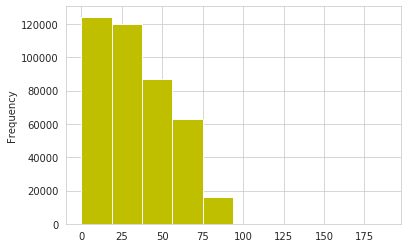

In [204]:
numeric_df.mths_since_last_delinq.plot.hist(color='y')

In [205]:
#as the column mths_since_last_delinq is squewed impute it with median
print(numeric_df.mths_since_last_delinq.median())

31.0


In [206]:
numeric_df.mths_since_last_delinq = numeric_df.mths_since_last_delinq.fillna(31.0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


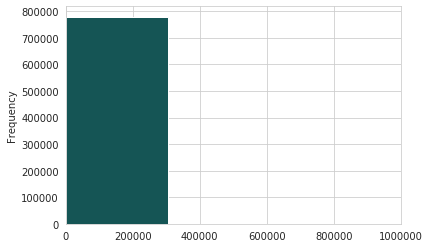

In [207]:

numeric_df.tot_coll_amt.plot.hist(bins =30, color='#155555')
plt.xlim(0, 1000000)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


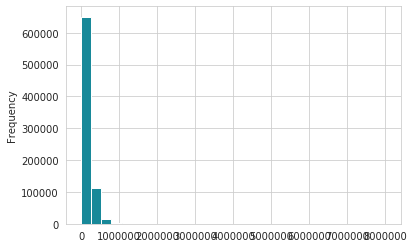

In [208]:
print(numeric_df.tot_cur_bal.plot.hist(bins=30,color='#188999'))
plt.show()

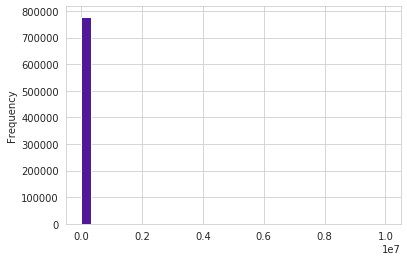

In [209]:
numeric_df.total_rev_hi_lim.plot.hist(bins=30,color='#511999')

In [210]:
#Imputing total_coll_amt 
numeric_df.tot_coll_amt.fillna(numeric_df.tot_coll_amt.median(),inplace=True)

#Imputing total_cur_bal
numeric_df.tot_cur_bal.fillna(numeric_df.tot_cur_bal.median(),inplace=True)

# imputing total_rev_hi_lim
numeric_df.total_rev_hi_lim = numeric_df.total_rev_hi_lim.fillna(23800.0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# DateTime DF

In [211]:
datetime_df.isnull().sum()/len(datetime_df)*100

earliest_cr_line       0.000000
issue_d                0.000000
last_credit_pull_d     0.000000
last_pymnt_d           0.000000
next_pymnt_d          29.787252
dtype: float64

In [212]:
from datetime import timedelta, date
datetime_df.last_pymnt_d[:5]

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-01-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [213]:
from datetime import timedelta, date
datetime_df.last_pymnt_d[:5]
xh = datetime_df.last_pymnt_d + timedelta(31)

#Considering next_pymnt_d to be the date after 30 days of last_pymnt_d
next_pmt = datetime_df.last_pymnt_d + timedelta(30)

datetime_df.next_pymnt_d = datetime_df.next_pymnt_d.fillna(next_pmt)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [214]:
# creating new feature from date variables

#last_credit_pull_d :: The most recent month XYZ corp. pulled credit for this loan 

#Meaning of Credit Pull :: The potential lender checks the consumer's credit report, which creates a small 
# negative impact on the consumer's credit score.
# The obvious result can  be seen below where credit pull date is recent falls in defaulter category.

new_feature1 = datetime_df.last_credit_pull_d - datetime_df.issue_d

date_feature = pd.DataFrame({'new_var1':new_feature1,'Target':credit_risk.default_ind})
date_feature.head()

,new_var1,Target
0,1492 days,0
1,640 days,1
2,1492 days,0
3,1127 days,0
4,1492 days,0


In [0]:
date_feature.new_var1 = date_feature.new_var1.astype("str")
date_feature['new_var1']=date_feature['new_var1'].str.split(' ').str[0]
date_feature.new_var1 = date_feature.new_var1.astype('int64')

In [216]:
print(date_feature.groupby('Target').new_var1.mean())
#From above observation it is clear that there is relation between  targerget and date variables

Target
0    465.227887
1    700.218507
Name: new_var1, dtype: float64


In [0]:
date_feature = date_feature.drop(["Target"],axis =1)

# Feature Selection

# Numeric DF

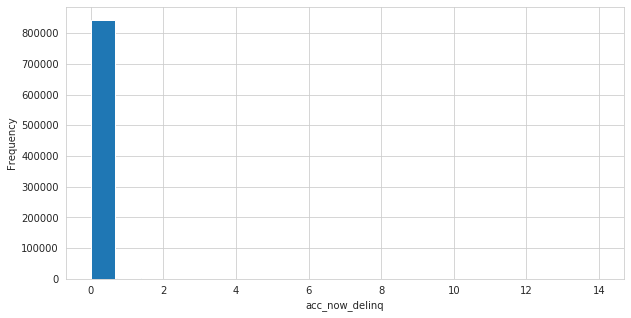

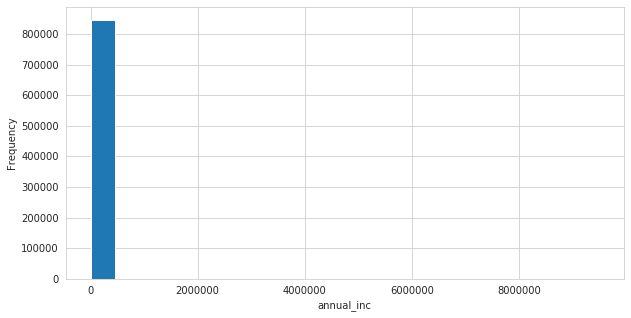

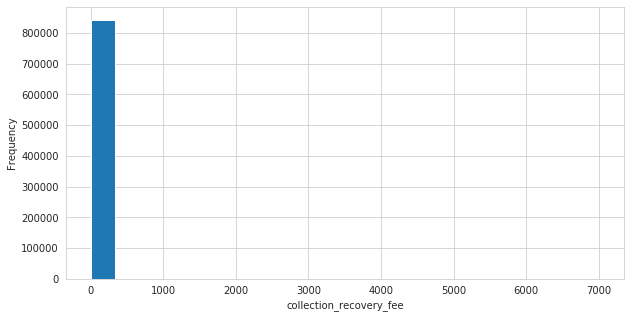

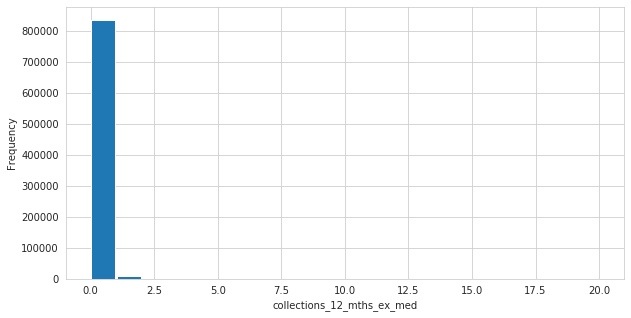

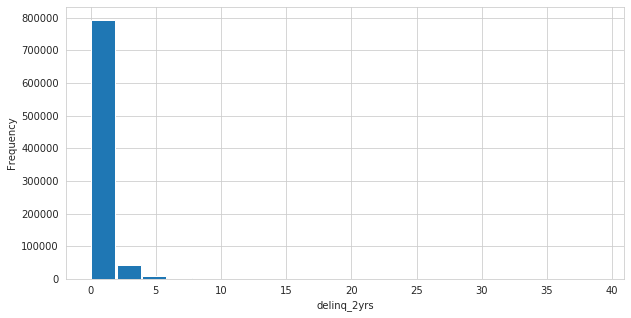

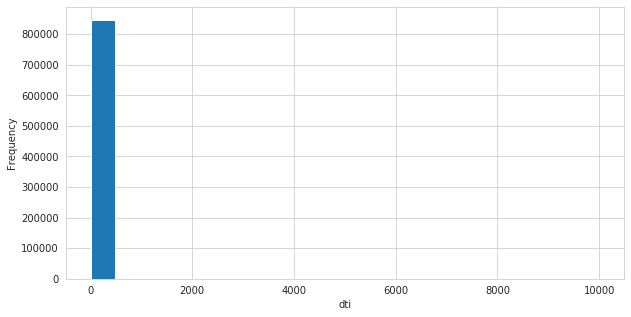

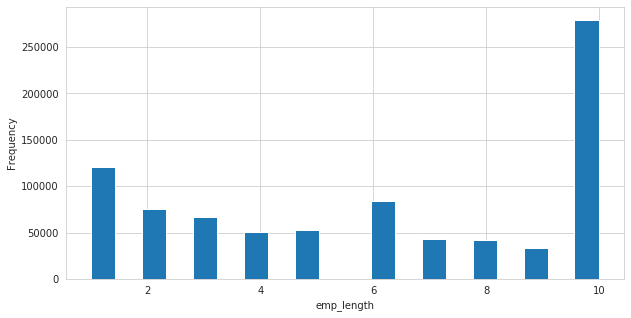

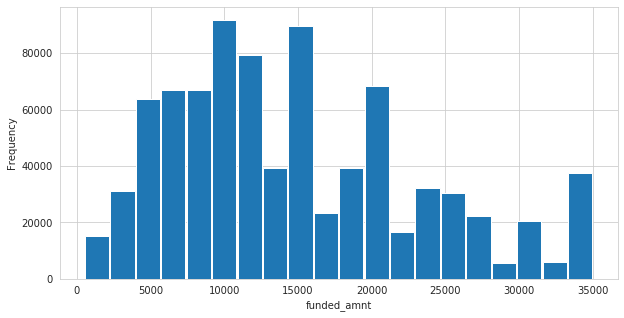

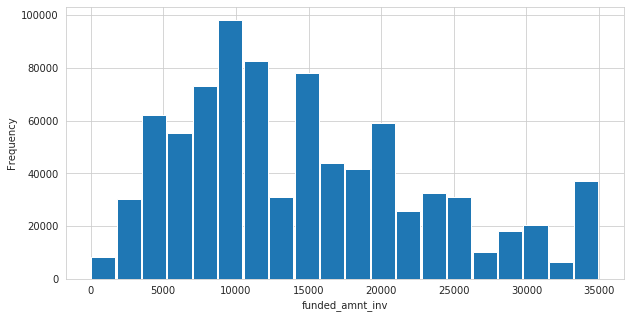

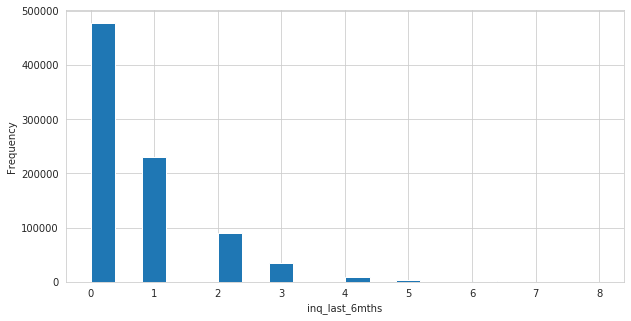

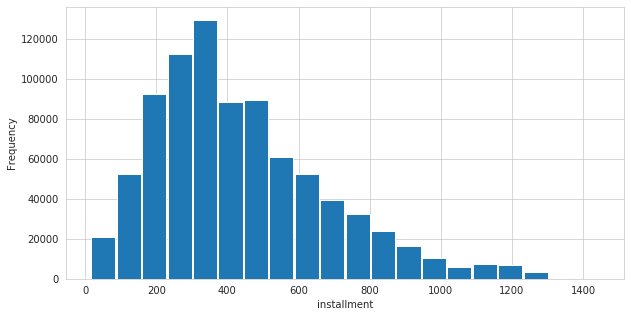

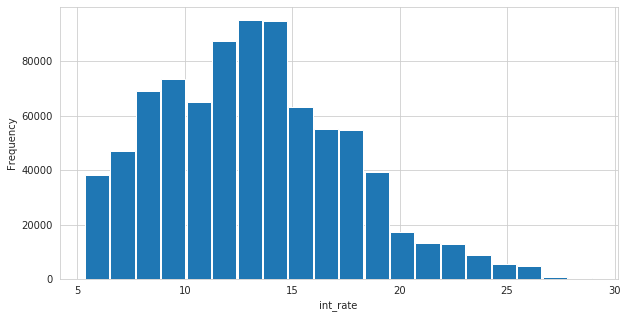

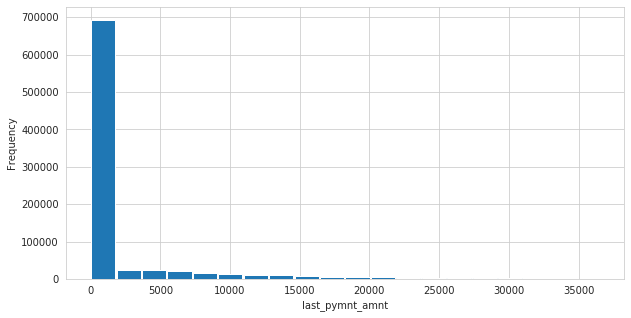

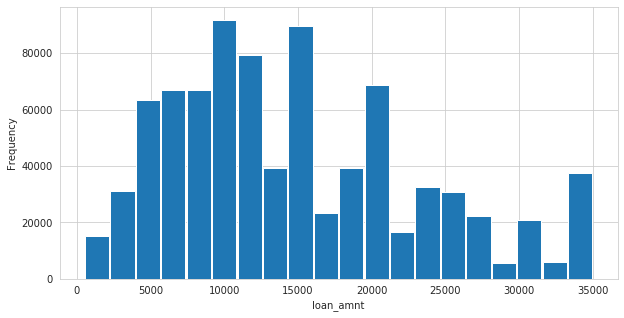

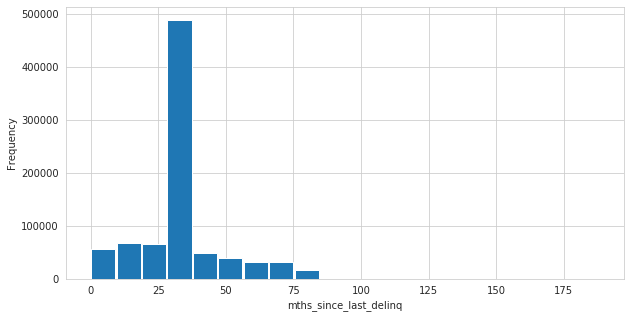

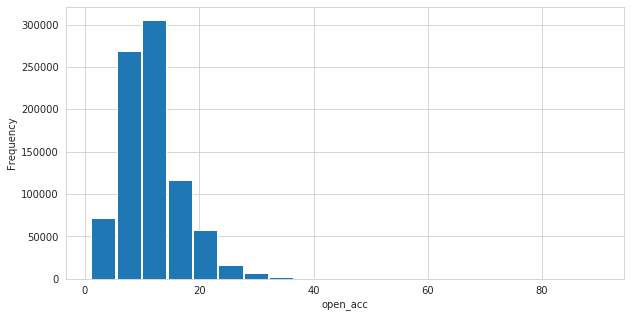

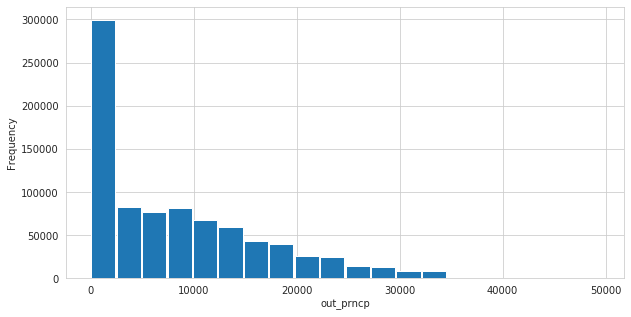

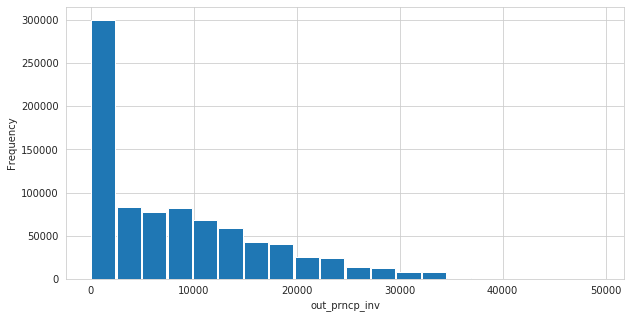

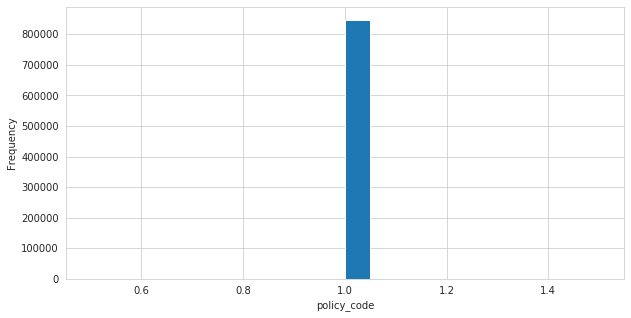

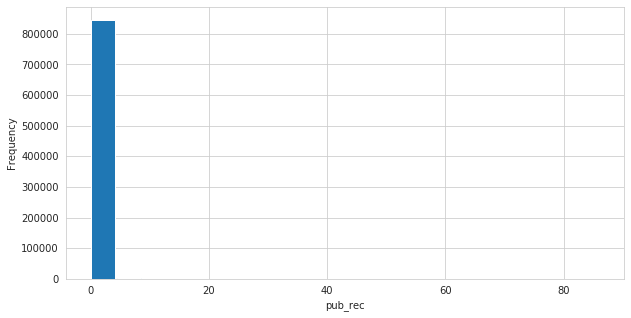

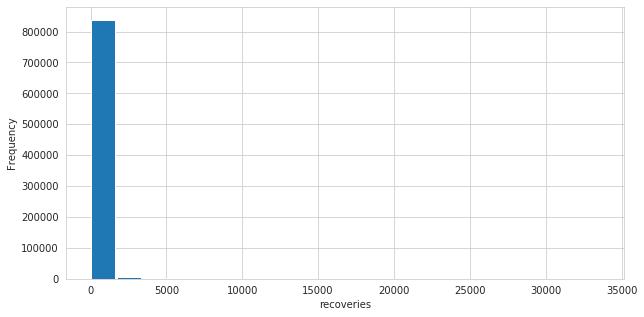

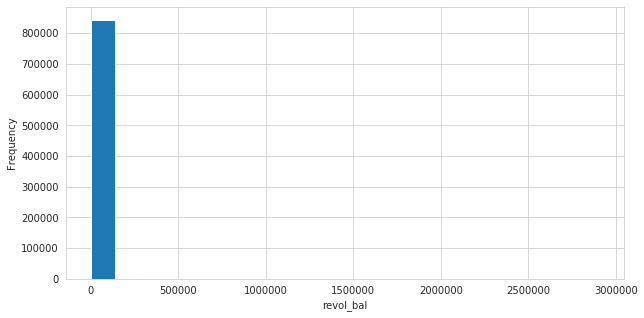

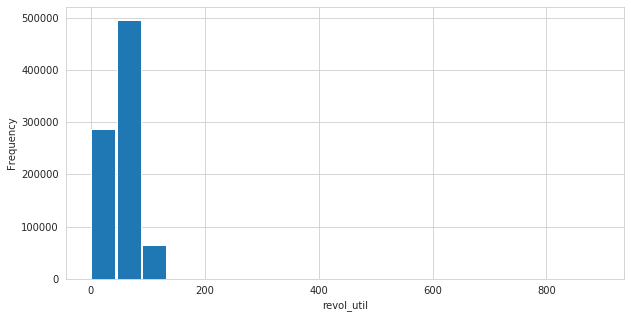

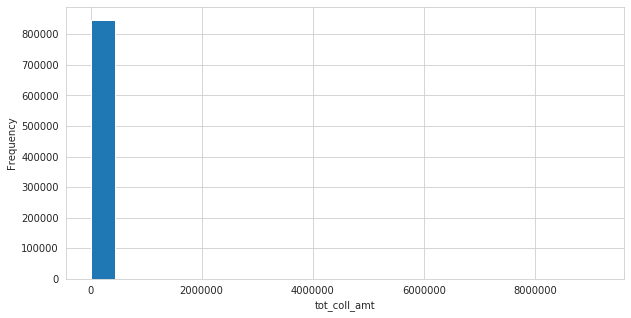

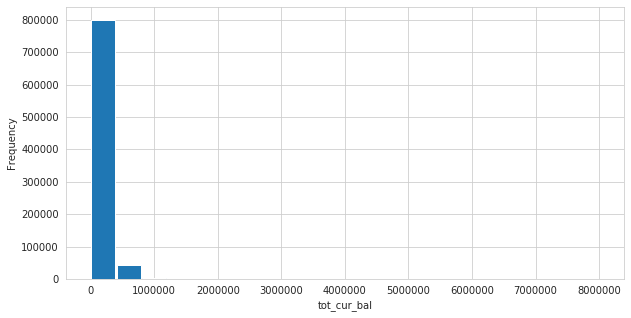

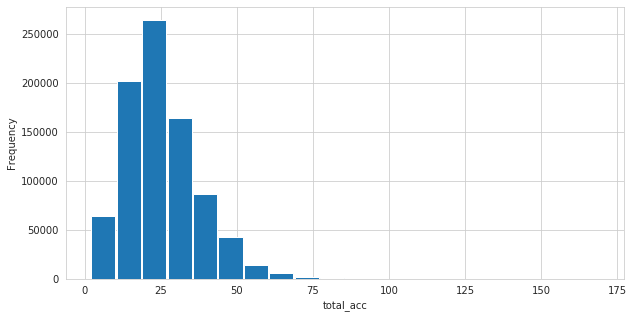

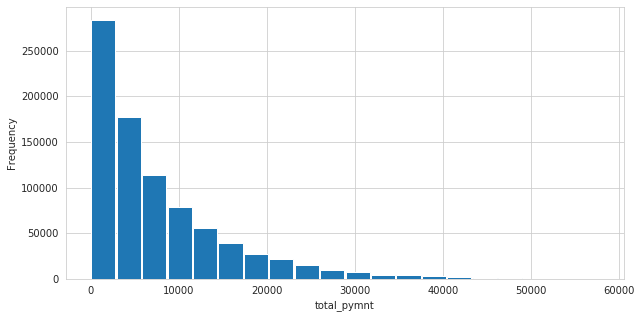

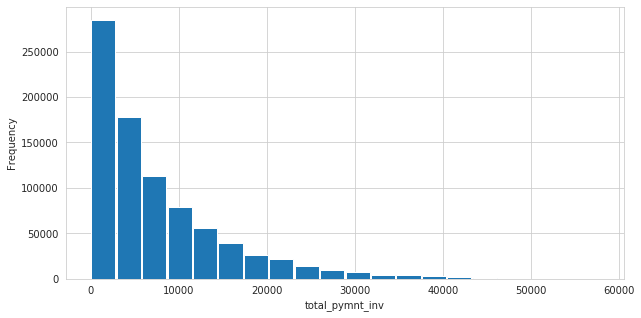

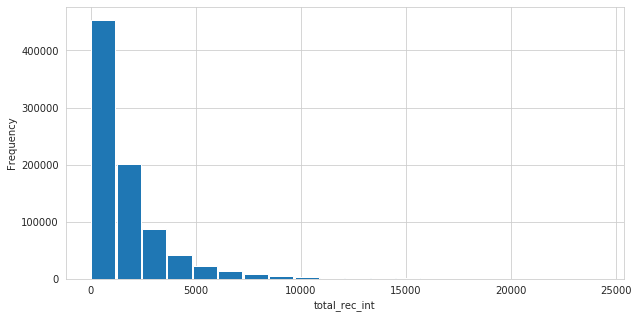

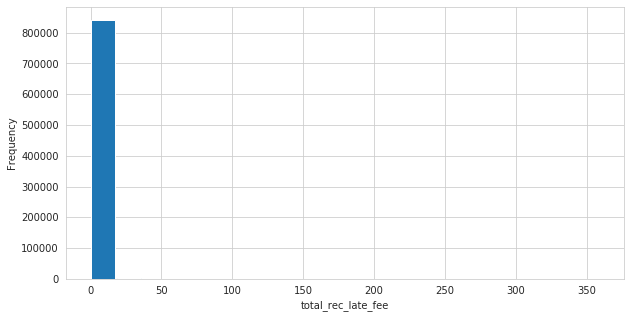

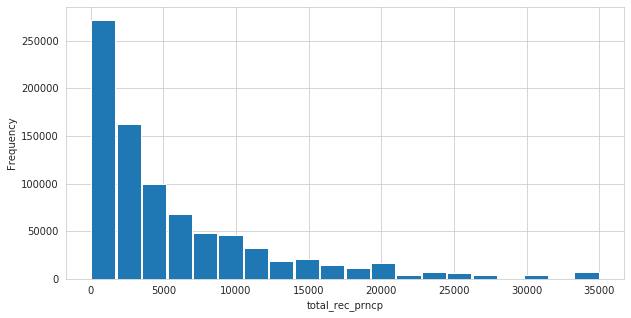

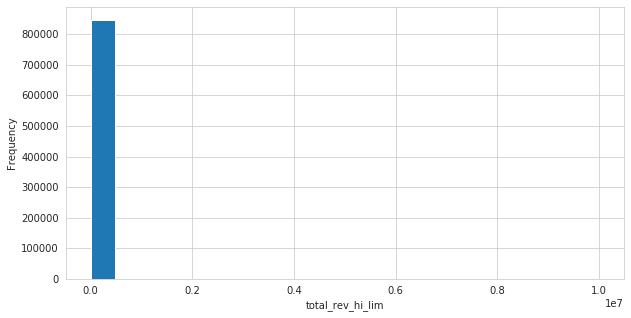

In [219]:
for i in numeric_df.columns:
    plt.figure(figsize=(10,5))
    plt.hist(numeric_df[i],bins=20,rwidth=0.95)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

In [220]:
ls_max = []
for col in numeric_df.columns.values:
    count = numeric_df[col].value_counts().max()
    percent_count = count/len(numeric_df)*100
    mod = numeric_df[col].mode()
    print("Max count Column name: ",col,"\nMode:",mod,"\nCount:",count,"\nIt's representation in column in terms of %:",percent_count,"\n")
    if percent_count >= 95:
          ls_max.append(col)
      
        
print("The columns having same value more than 95% :",ls_max)

Max count Column name:  acc_now_delinq 
Mode: 0    0.0
dtype: float64 
Count: 842658 
It's representation in column in terms of %: 99.54142745765114 

Max count Column name:  annual_inc 
Mode: 0    60000.0
dtype: float64 
Count: 32650 
It's representation in column in terms of %: 3.856876225577055 

Max count Column name:  collection_recovery_fee 
Mode: 0    0.0
dtype: float64 
Count: 823863 
It's representation in column in terms of %: 97.32121340988022 

Max count Column name:  collections_12_mths_ex_med 
Mode: 0    0.0
dtype: float64 
Count: 835590 
It's representation in column in terms of %: 98.70649939754766 

Max count Column name:  delinq_2yrs 
Mode: 0    0.0
dtype: float64 
Count: 685179 
It's representation in column in terms of %: 80.93876249202636 

Max count Column name:  dti 
Mode: 0    19.2
dtype: float64 
Count: 652 
It's representation in column in terms of %: 0.07701939660264134 

Max count Column name:  emp_length 
Mode: 0    10
dtype: int64 
Count: 279111 
It's repr

After having a closer look at the data, we can remove the following variables, reasons described:
1. acc_now_delinq is 0 for almost 100% of the records
2. collection_recovery_fee is 0 for almost 100% of the records
3. collections_12_mths_ex_med is 0 for almost 100% of the record
4. policy_code is always == 1 i.e. 100% records contain 1 only
5. recoveries contain almost 98% 0s
6. total_rec_late_fee contain 99% of 0s

In [0]:
#Droping above mentioned columns
numeric_df = numeric_df.drop(['acc_now_delinq', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'policy_code', 
                              'recoveries', 'total_rec_late_fee'],axis =1)

In [222]:
numeric_df.head()

,annual_inc,delinq_2yrs,dti,emp_length,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim
0,24000.0,0.0,27.65,10,5000.0,4975.0,1.0,162.87,10.65,171.62,5000.0,31.0,3.0,0.0,0.0,0.0,13648.0,83.7,0.0,81024.5,9.0,5861.071414,5831.78,861.07,5000.00,23800.0
1,30000.0,0.0,1.00,1,2500.0,2500.0,5.0,59.83,15.27,119.66,2500.0,31.0,3.0,0.0,0.0,0.0,1687.0,9.4,0.0,81024.5,4.0,1008.710000,1008.71,435.17,456.46,23800.0
2,12252.0,0.0,8.72,10,2400.0,2400.0,2.0,84.33,15.96,649.91,2400.0,31.0,2.0,0.0,0.0,0.0,2956.0,98.5,0.0,81024.5,10.0,3003.653644,3003.65,603.65,2400.00,23800.0
3,49200.0,0.0,20.00,10,10000.0,10000.0,1.0,339.31,13.49,357.48,10000.0,35.0,10.0,0.0,0.0,0.0,5598.0,21.0,0.0,81024.5,37.0,12226.302212,12226.30,2209.33,10000.00,23800.0
4,80000.0,0.0,17.94,1,3000.0,3000.0,0.0,67.79,12.69,67.79,3000.0,38.0,15.0,766.9,766.9,0.0,27783.0,53.9,0.0,81024.5,38.0,3242.170000,3242.17,1009.07,2233.10,23800.0


In [223]:
numeric_df.describe()

,annual_inc,delinq_2yrs,dti,emp_length,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim
count,8.465400e+05,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,8.465400e+05,846540.000000,8.465400e+05,8.465400e+05,846540.000000,846540.000000,846540.000000,846540.000000,846540.000000,8.465400e+05
mean,7.503491e+04,0.311246,18.109631,6.099036,14732.308308,14700.343330,0.681454,436.326181,13.198145,2249.297420,14745.637891,32.535911,11.541709,8224.941391,8221.596415,0.194124,1.691293e+04,55.053265,2.070467e+02,1.351003e+05,25.274503,7732.885678,7701.874136,1773.520175,5912.170065,3.148773e+04
std,6.399427e+04,0.856726,17.455585,3.444669,8414.005679,8420.131179,0.964582,243.617584,4.368725,4884.797855,8419.937225,15.326263,5.301256,8431.362127,8427.952355,0.580634,2.222454e+04,23.803093,1.012166e+04,1.485266e+05,11.816239,7912.065592,7887.809534,2084.831173,6684.206559,3.628670e+04
min,0.000000e+00,0.000000,0.000000,1.000000,500.000000,0.000000,0.000000,15.690000,5.320000,0.000000,500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,4.500000e+04,0.000000,11.880000,3.000000,8000.000000,8000.000000,0.000000,260.790000,9.990000,291.040000,8000.000000,31.000000,8.000000,0.000000,0.000000,0.000000,6.478000e+03,37.700000,0.000000e+00,3.225775e+04,17.000000,2034.315000,2023.980000,466.817500,1289.050000,1.480000e+04
50%,6.500000e+04,0.000000,17.600000,6.000000,13000.000000,13000.000000,0.000000,382.550000,12.990000,471.650000,13000.000000,31.000000,11.000000,6200.530000,6197.995000,0.000000,1.191000e+04,56.000000,0.000000e+00,8.102450e+04,24.000000,5056.285000,5035.460000,1093.655000,3352.660000,2.380000e+04
75%,9.000000e+04,0.000000,23.880000,10.000000,20000.000000,20000.000000,1.000000,571.560000,15.990000,857.002500,20000.000000,31.000000,14.000000,13443.770000,13439.330000,0.000000,2.085800e+04,73.500000,0.000000e+00,1.963022e+05,32.000000,10827.345000,10782.710000,2252.580000,8000.000000,3.790000e+04
max,9.500000e+06,39.000000,9999.000000,10.000000,35000.000000,35000.000000,8.000000,1445.460000,28.990000,36475.590000,35000.000000,188.000000,90.000000,49372.860000,49372.860000,86.000000,2.904836e+06,892.300000,9.152545e+06,8.000078e+06,169.000000,57777.579870,57777.580000,24205.620000,35000.030000,9.999999e+06


## Corr Plot

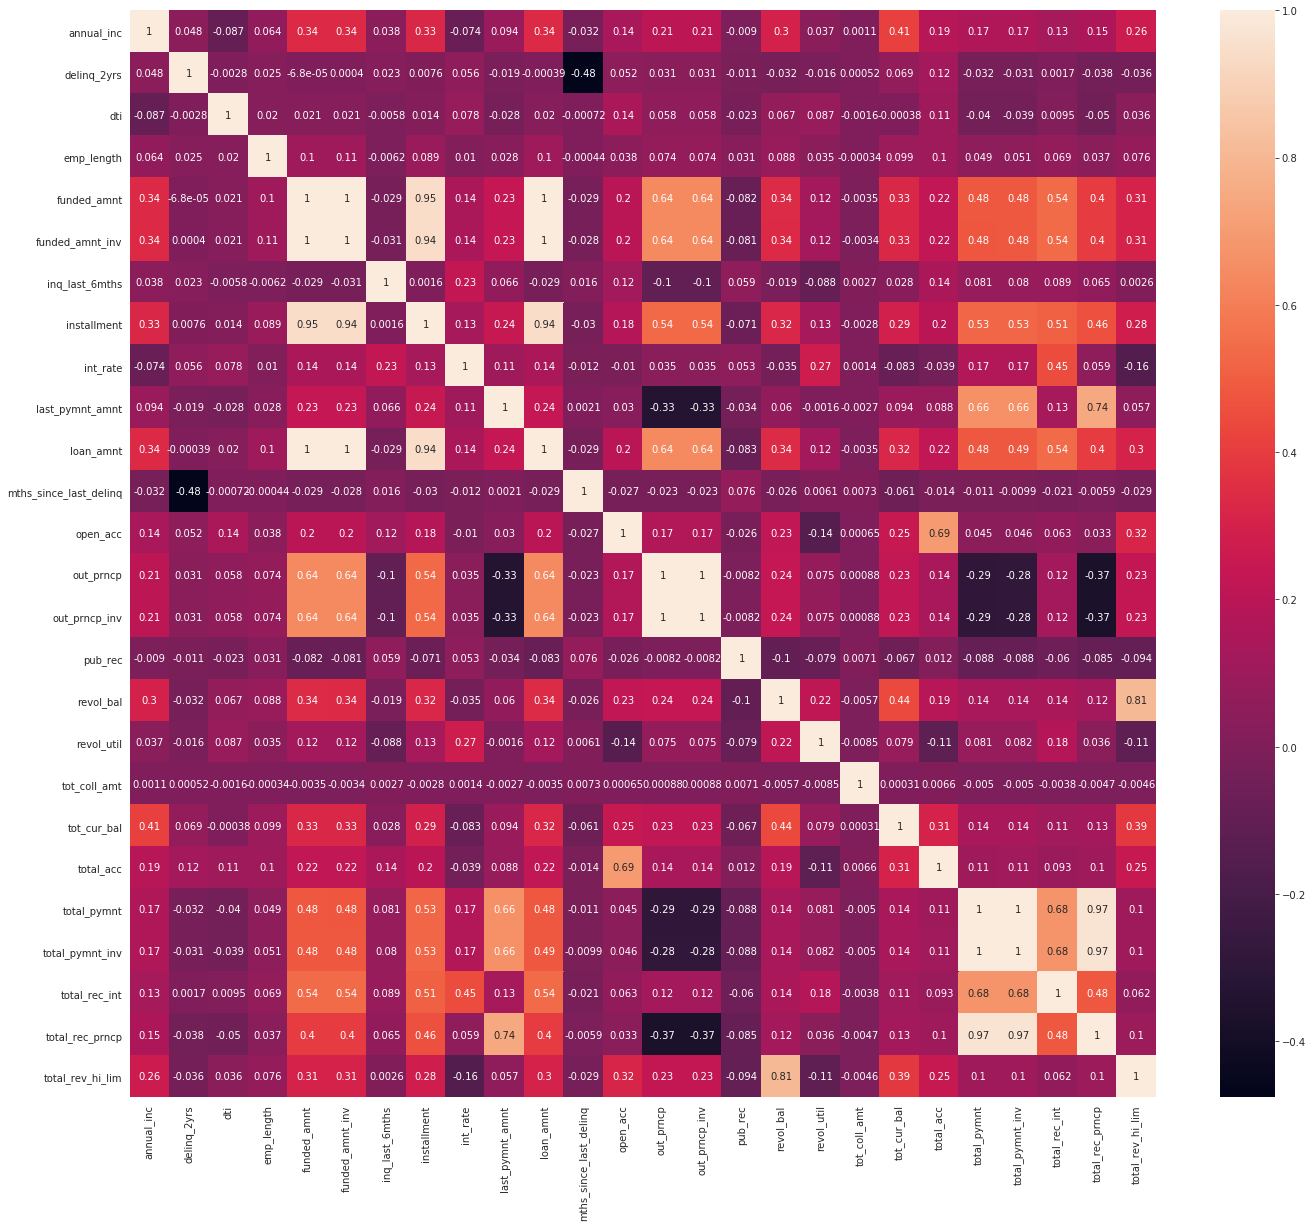

In [224]:
plt.figure(figsize=(23,20))

num_corr = numeric_df.corr()

sns.heatmap(num_corr,
           xticklabels = num_corr.columns.values,
           yticklabels = num_corr.columns.values,
           annot = True)

From above analysis using corplot we decided to eliminate some variables which are having very strong correlation.

1)funded_amnt 
2)out_prncp
3)total_pmnt
4)total_rec_prncp
5)total_pmnt 
6)installement
7)total_rev_hi_lim

In [225]:
ls = ["funded_amnt","out_prncp","total_pymnt","total_rec_prncp","installment","total_rev_hi_lim"]
numeric_df = numeric_df.drop(ls,axis = 1)
numeric_df.shape

(846540, 20)

# Convert Some Numeric Variables Into Categories

In [226]:
# converting delinq_2years into category type as it contain more than 80 % of records which has 0 value
categorical_df['cat_delinq_2yrs']='N'
categorical_df.loc[ numeric_df['delinq_2yrs'] > 0, 'cat_delinq_2yrs'] = 'Y'
# removing variable from numeric_df
numeric_df = numeric_df.drop('delinq_2yrs',axis=1)


# converting inq_last_6mths into category type
categorical_df['cat_inq_last_6mths']='N'
categorical_df.loc[ numeric_df['inq_last_6mths'] > 0, 'cat_inq_last_6mths'] = 'Y'
# removing variable from numeric_df
numeric_df = numeric_df.drop('inq_last_6mths',axis=1)


# converting pub_rec into category type
categorical_df['cat_pub_rec']='N'
categorical_df.loc[ numeric_df['pub_rec'] > 0, 'cat_pub_rec'] = 'Y'
# removing variable from numeric_df
numeric_df = numeric_df.drop('pub_rec',axis=1)

categorical_df['amt_difference'] = 'eq'
categorical_df.loc[ ( credit_risk['funded_amnt'] - credit_risk['funded_amnt_inv']) > 0, 'amt_difference' ] = 'less'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [0]:
#Creating new variable as account_ration taking ration = open_acc/total_acc
numeric_df["account_raion"] = numeric_df.open_acc/numeric_df.total_acc

In [0]:
#Dropping above columns
lst = ["open_acc","total_acc"]
numeric_df = numeric_df.drop(lst, axis = 1)

In [229]:
numeric_df.shape

(846540, 16)

In [230]:
categorical_df.isnull().sum()/len(categorical_df)*100

addr_state             0.0
application_type       0.0
default_ind            0.0
emp_title              0.0
grade                  0.0
home_ownership         0.0
initial_list_status    0.0
purpose                0.0
pymnt_plan             0.0
sub_grade              0.0
term                   0.0
title                  0.0
verification_status    0.0
cat_delinq_2yrs        0.0
cat_inq_last_6mths     0.0
cat_pub_rec            0.0
amt_difference         0.0
dtype: float64

# Categorical DF

In [231]:
categorical_df.head(5)

,addr_state,application_type,default_ind,emp_title,grade,home_ownership,initial_list_status,purpose,pymnt_plan,sub_grade,term,title,verification_status,cat_delinq_2yrs,cat_inq_last_6mths,cat_pub_rec,amt_difference
0,AZ,INDIVIDUAL,0,other,B,RENT,f,credit_card,n,B2,36,Computer,Verified,N,Y,N,less
1,GA,INDIVIDUAL,1,Ryder,C,RENT,f,car,n,C4,60,bike,Source Verified,N,Y,N,eq
2,IL,INDIVIDUAL,0,other,C,RENT,f,small_business,n,C5,36,real estate business,Not Verified,N,Y,N,eq
3,CA,INDIVIDUAL,0,AIR RESOURCES BOARD,C,RENT,f,other,n,C1,36,personel,Source Verified,N,Y,N,eq
4,OR,INDIVIDUAL,0,University Medical Group,B,RENT,f,other,n,B5,60,Personal,Source Verified,N,N,N,eq


In [232]:
categorical_df.shape

(846540, 17)

In [233]:
categorical_df.describe()

,addr_state,application_type,default_ind,emp_title,grade,home_ownership,initial_list_status,purpose,pymnt_plan,sub_grade,term,title,verification_status,cat_delinq_2yrs,cat_inq_last_6mths,cat_pub_rec,amt_difference
count,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540
unique,51,2,2,288749,7,6,2,14,2,35,2,60833,3,2,2,2,2
top,CA,INDIVIDUAL,0,other,B,MORTGAGE,f,debt_consolidation,n,B3,36,Debt consolidation,Source Verified,N,N,N,eq
freq,123818,846169,800665,48819,245251,424652,440525,500171,846535,54402,593708,393036,314541,685179,477175,717653,751065


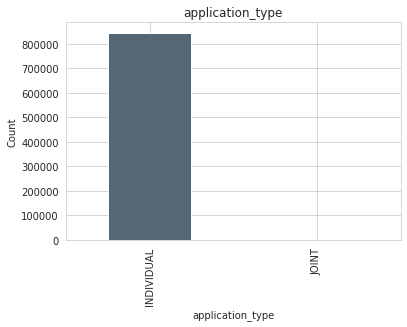

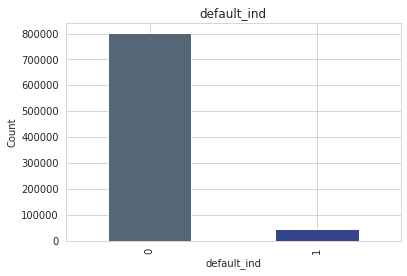

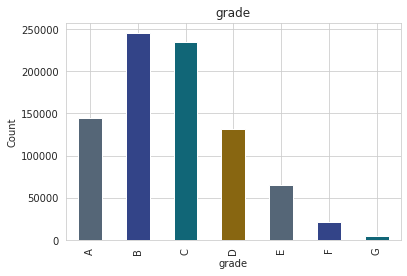

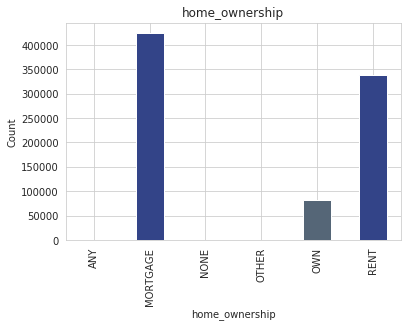

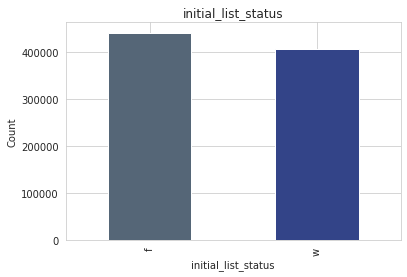

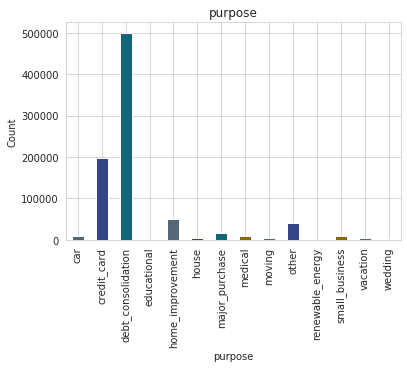

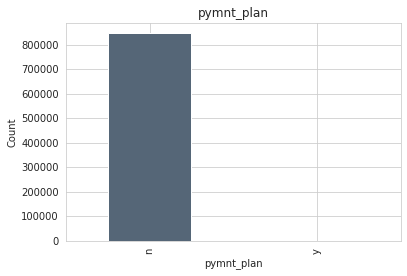

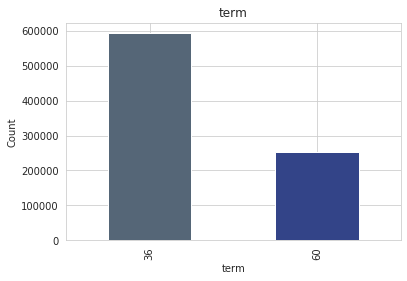

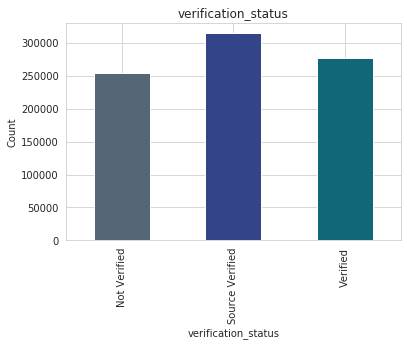

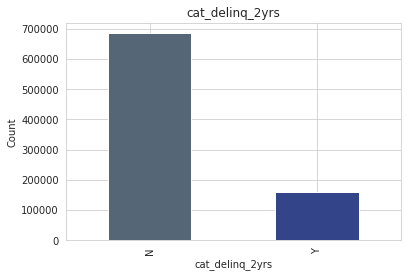

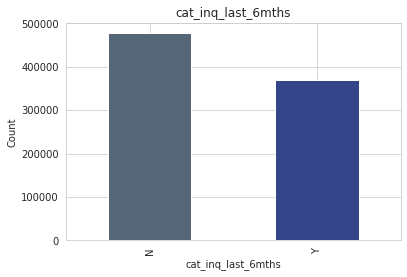

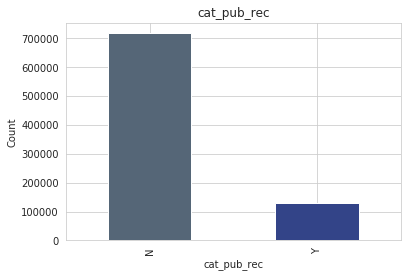

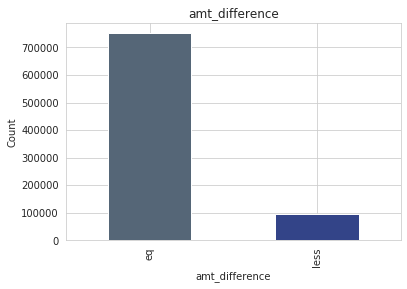

In [234]:
for var in categorical_df.columns:
    if len(categorical_df[var].unique()) <= 20:
        categorical_df.groupby(var)[var].count().plot.bar(color=['#556677','#334488','#116677','#886611'])
        plt.title(var)
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.show()

In [235]:
print(categorical_df.pymnt_plan.value_counts(),"\n")
print(categorical_df.application_type.value_counts(),"\n")
print(categorical_df.default_ind.value_counts())

n    846535
y         5
Name: pymnt_plan, dtype: int64 

INDIVIDUAL    846169
JOINT            371
Name: application_type, dtype: int64 

0    800665
1     45875
Name: default_ind, dtype: int64


After having a closer look at the data, we can remove the following variables, reasons described:
1. application_type is 'INDIVIDUAL' for almost 100% 
2. pymnt_plan has only 10 y and 887372 n.
3. Our target variable i.e. default_ind is imbalanced. We will consider this fact while sampling.

In [236]:
categorical_df = categorical_df.drop(["application_type","pymnt_plan"], axis = 1)
categorical_df.shape

(846540, 15)

In [237]:
categorical_df.describe()

,addr_state,default_ind,emp_title,grade,home_ownership,initial_list_status,purpose,sub_grade,term,title,verification_status,cat_delinq_2yrs,cat_inq_last_6mths,cat_pub_rec,amt_difference
count,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540
unique,51,2,288749,7,6,2,14,35,2,60833,3,2,2,2,2
top,CA,0,other,B,MORTGAGE,f,debt_consolidation,B3,36,Debt consolidation,Source Verified,N,N,N,eq
freq,123818,800665,48819,245251,424652,440525,500171,54402,593708,393036,314541,685179,477175,717653,751065


In [238]:
# Dropping emp_title, title as it contains too many categories and logically thinking it will 
# not contribute to our predicion.

categorical_df = categorical_df.drop("emp_title", axis =1)

categorical_df = categorical_df.drop("title", axis =1)
categorical_df.shape

(846540, 13)

In [239]:
# For the columns which are having categories greater than 20 we can at least find the category having 
# highest frequency using mode and it's percentage in that column
for col in categorical_df.columns.values:
    if categorical_df[col].nunique() > 20:
        mod = categorical_df[col].mode()
        count = categorical_df[col].value_counts().max()
        percent = count/len(categorical_df)*100
        print("Column Name:",col,"\nMode:",mod,"\nCount:",count,"\nIt's Representation in Percentage:",percent,"\n")


Column Name: addr_state 
Mode: 0    CA
dtype: object 
Count: 123818 
It's Representation in Percentage: 14.626361424150069 

Column Name: sub_grade 
Mode: 0    B3
dtype: object 
Count: 54402 
It's Representation in Percentage: 6.426394499964562 



## Chi Square Test

In [240]:
categorical_df.head()

,addr_state,default_ind,grade,home_ownership,initial_list_status,purpose,sub_grade,term,verification_status,cat_delinq_2yrs,cat_inq_last_6mths,cat_pub_rec,amt_difference
0,AZ,0,B,RENT,f,credit_card,B2,36,Verified,N,Y,N,less
1,GA,1,C,RENT,f,car,C4,60,Source Verified,N,Y,N,eq
2,IL,0,C,RENT,f,small_business,C5,36,Not Verified,N,Y,N,eq
3,CA,0,C,RENT,f,other,C1,36,Source Verified,N,Y,N,eq
4,OR,0,B,RENT,f,other,B5,60,Source Verified,N,N,N,eq


In [241]:
# chi square test
target = categorical_df.iloc[:,1]
cat_check = categorical_df.drop("default_ind",axis = 1)
from scipy.stats import chi2_contingency

def chi2(col):
  table = pd.crosstab(target,cat_check[col])
  chi2, p, dof, expected = chi2_contingency(table.values)
  print("Column Name:",col,":::""Chi2 value:{} and p_value:{}".format(chi2,p),"\n")

#ls=[(map(chi2,[cat_check.columns]))]
ls=list((map(chi2,list(cat_check.columns))))


Column Name: addr_state :::Chi2 value:794.8595978876677 and p_value:1.0350303715164354e-134 

Column Name: grade :::Chi2 value:13103.360735125918 and p_value:0.0 

Column Name: home_ownership :::Chi2 value:1082.1116110673802 and p_value:9.997228289374614e-232 

Column Name: initial_list_status :::Chi2 value:8020.996117285587 and p_value:0.0 

Column Name: purpose :::Chi2 value:2953.709675914596 and p_value:0.0 

Column Name: sub_grade :::Chi2 value:14024.595767660985 and p_value:0.0 

Column Name: term :::Chi2 value:867.0985258987282 and p_value:1.394292469842119e-190 

Column Name: verification_status :::Chi2 value:2216.410420309429 and p_value:0.0 

Column Name: cat_delinq_2yrs :::Chi2 value:95.33128753143605 and p_value:1.610476321553508e-22 

Column Name: cat_inq_last_6mths :::Chi2 value:3219.2266378721347 and p_value:0.0 

Column Name: cat_pub_rec :::Chi2 value:309.26375436977986 and p_value:3.159449743700687e-69 

Column Name: amt_difference :::Chi2 value:1426.4533597992656 and p

# Bivariate Analysis

In [0]:
bia_var = pd.DataFrame(numeric_df)
bia_var.head()
bia_var["target"] = categorical_df.default_ind

AxesSubplot(0.125,0.125;0.775x0.755)


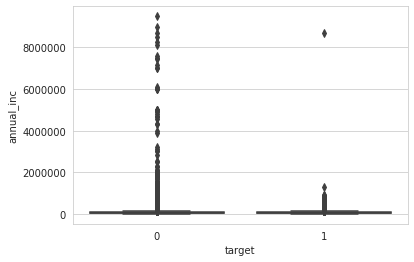

In [243]:
sns.set_style("whitegrid")
print(sns.boxplot(x = "target", y = "annual_inc" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


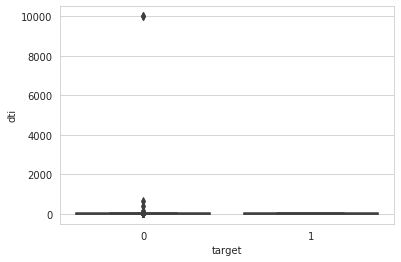

In [244]:
print(sns.boxplot(x = "target", y = "dti" , data = bia_var))
# dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
# excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.

AxesSubplot(0.125,0.125;0.775x0.755)


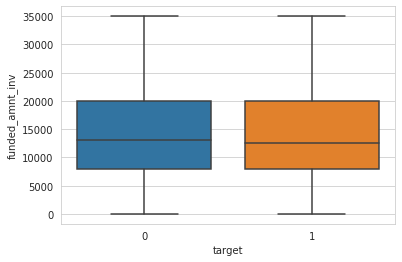

In [0]:
print(sns.boxplot(x = "target", y = "funded_amnt_inv" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


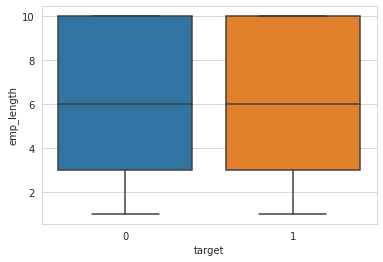

In [0]:
print(sns.boxplot(x = "target", y = "emp_length" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


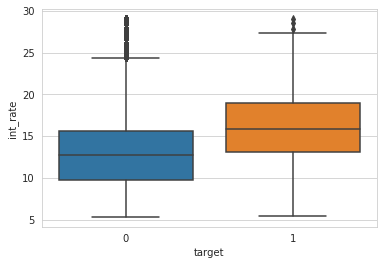

In [0]:
print(sns.boxplot(x = "target", y = "int_rate" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


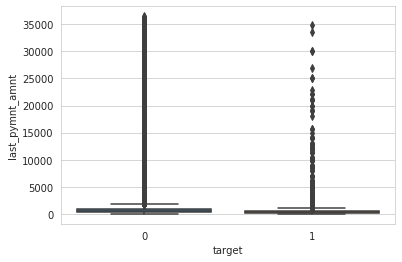

In [0]:
print(sns.boxplot(x = "target", y = "last_pymnt_amnt" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


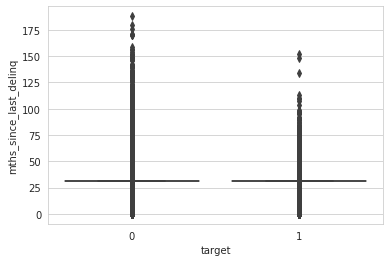

In [0]:
print(sns.boxplot(x = "target", y = "mths_since_last_delinq" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


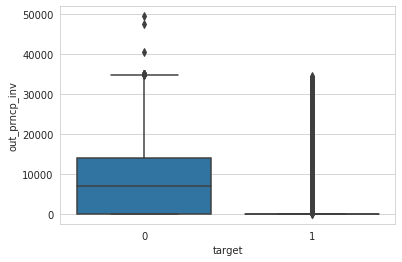

In [0]:
print(sns.boxplot(x = "target", y = "out_prncp_inv" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


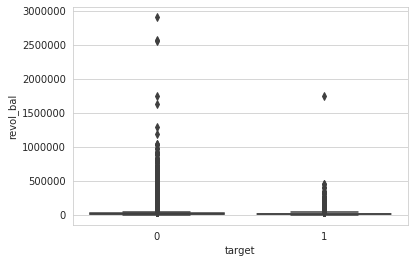

In [0]:
print(sns.boxplot(x = "target", y = "revol_bal" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


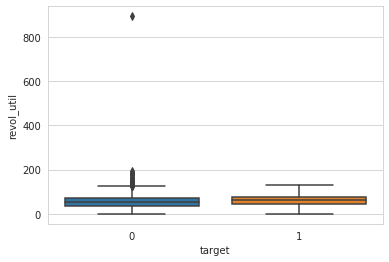

In [0]:
print(sns.boxplot(x = "target", y = "revol_util" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


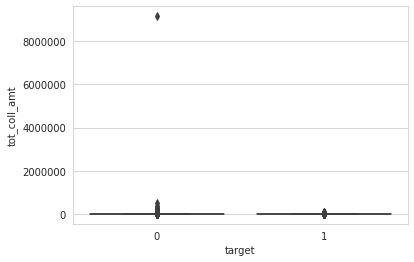

In [0]:
print(sns.boxplot(x = "target", y = "tot_coll_amt" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


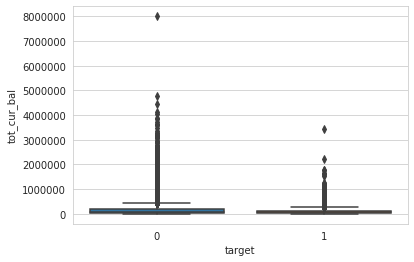

In [0]:
print(sns.boxplot(x = "target", y = "tot_cur_bal" , data = bia_var))

AxesSubplot(0.125,0.125;0.775x0.755)


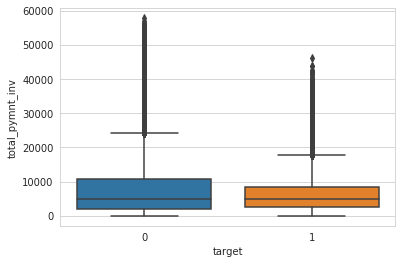

In [0]:
print(sns.boxplot(x = "target", y = "total_pymnt_inv" , data = bia_var))

#  Label Encoder on Categorical Data

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#applying label encoder to all columns of categorical data frame 
for i in range(0,(len(categorical_df.columns))):
    categorical_df.iloc[:,i] = le.fit_transform(categorical_df.iloc[:,i])

In [246]:
#Label encoder will automatically convert nominal data into ordinal data and treat it as numeric
# Therefore converting it inot category.
categorical_df.dtypes

addr_state             int64
default_ind            int64
grade                  int64
home_ownership         int64
initial_list_status    int64
purpose                int64
sub_grade              int64
term                   int64
verification_status    int64
cat_delinq_2yrs        int64
cat_inq_last_6mths     int64
cat_pub_rec            int64
amt_difference         int64
dtype: object

In [0]:
categorical_df = categorical_df.astype("str")

In [248]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846540 entries, 0 to 855968
Data columns (total 13 columns):
addr_state             846540 non-null object
default_ind            846540 non-null object
grade                  846540 non-null object
home_ownership         846540 non-null object
initial_list_status    846540 non-null object
purpose                846540 non-null object
sub_grade              846540 non-null object
term                   846540 non-null object
verification_status    846540 non-null object
cat_delinq_2yrs        846540 non-null object
cat_inq_last_6mths     846540 non-null object
cat_pub_rec            846540 non-null object
amt_difference         846540 non-null object
dtypes: object(13)
memory usage: 130.4+ MB


In [249]:
len(categorical_df.columns)

13

In [250]:
categorical_df.describe()

,addr_state,default_ind,grade,home_ownership,initial_list_status,purpose,sub_grade,term,verification_status,cat_delinq_2yrs,cat_inq_last_6mths,cat_pub_rec,amt_difference
count,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540,846540
unique,51,2,7,6,2,14,35,2,3,2,2,2,2
top,4,0,1,1,0,2,7,0,1,0,0,0,0
freq,123818,800665,245251,424652,440525,500171,54402,593708,314541,685179,477175,717653,751065


# Concatenation of Columns

In [0]:
credit_new = pd.concat([numeric_df,categorical_df,date_feature], axis = 1)

In [252]:
credit_new.head()
#print(credit_new.shape)

,annual_inc,dti,emp_length,funded_amnt_inv,int_rate,last_pymnt_amnt,loan_amnt,mths_since_last_delinq,out_prncp_inv,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_pymnt_inv,total_rec_int,account_raion,target,addr_state,default_ind,grade,home_ownership,initial_list_status,purpose,sub_grade,term,verification_status,cat_delinq_2yrs,cat_inq_last_6mths,cat_pub_rec,amt_difference,new_var1
0,24000.0,27.65,10,4975.0,10.65,171.62,5000.0,31.0,0.0,13648.0,83.7,0.0,81024.5,5831.78,861.07,0.333333,0,3,0,1,5,0,1,6,0,2,0,1,0,1,1492
1,30000.0,1.00,1,2500.0,15.27,119.66,2500.0,31.0,0.0,1687.0,9.4,0.0,81024.5,1008.71,435.17,0.750000,1,10,1,2,5,0,0,13,1,1,0,1,0,0,640
2,12252.0,8.72,10,2400.0,15.96,649.91,2400.0,31.0,0.0,2956.0,98.5,0.0,81024.5,3003.65,603.65,0.200000,0,14,0,2,5,0,11,14,0,0,0,1,0,0,1492
3,49200.0,20.00,10,10000.0,13.49,357.48,10000.0,35.0,0.0,5598.0,21.0,0.0,81024.5,12226.30,2209.33,0.270270,0,4,0,2,5,0,9,10,0,1,0,1,0,0,1127
4,80000.0,17.94,1,3000.0,12.69,67.79,3000.0,38.0,766.9,27783.0,53.9,0.0,81024.5,3242.17,1009.07,0.394737,0,37,0,1,5,0,9,9,1,1,0,0,0,0,1492


In [0]:
credit_new = credit_new.reindex(sorted(credit_new.columns),axis =1)

In [254]:
credit_new.head()

,account_raion,addr_state,amt_difference,annual_inc,cat_delinq_2yrs,cat_inq_last_6mths,cat_pub_rec,default_ind,dti,emp_length,funded_amnt_inv,grade,home_ownership,initial_list_status,int_rate,last_pymnt_amnt,loan_amnt,mths_since_last_delinq,new_var1,out_prncp_inv,purpose,revol_bal,revol_util,sub_grade,target,term,tot_coll_amt,tot_cur_bal,total_pymnt_inv,total_rec_int,verification_status
0,0.333333,3,1,24000.0,0,1,0,0,27.65,10,4975.0,1,5,0,10.65,171.62,5000.0,31.0,1492,0.0,1,13648.0,83.7,6,0,0,0.0,81024.5,5831.78,861.07,2
1,0.750000,10,0,30000.0,0,1,0,1,1.00,1,2500.0,2,5,0,15.27,119.66,2500.0,31.0,640,0.0,0,1687.0,9.4,13,1,1,0.0,81024.5,1008.71,435.17,1
2,0.200000,14,0,12252.0,0,1,0,0,8.72,10,2400.0,2,5,0,15.96,649.91,2400.0,31.0,1492,0.0,11,2956.0,98.5,14,0,0,0.0,81024.5,3003.65,603.65,0
3,0.270270,4,0,49200.0,0,1,0,0,20.00,10,10000.0,2,5,0,13.49,357.48,10000.0,35.0,1127,0.0,9,5598.0,21.0,10,0,0,0.0,81024.5,12226.30,2209.33,1
4,0.394737,37,0,80000.0,0,0,0,0,17.94,1,3000.0,1,5,0,12.69,67.79,3000.0,38.0,1492,766.9,9,27783.0,53.9,9,0,1,0.0,81024.5,3242.17,1009.07,1


In [0]:
credit_new = credit_new.drop("target",axis=1)

In [258]:
credit_new.shape

(846540, 30)

# Finding The Important Features

In [259]:
# splitting data into dependant and independant
credit_y = credit_new.iloc[:,7]
credit_x = credit_new.drop("default_ind",axis =1)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(credit_x,credit_y)

importance1 = dt.feature_importances_
imp_features1 = pd.DataFrame({"Features":credit_x.columns,"Importance":importance1})
imp_features1.sort_values("Importance",axis=0, ascending=False)


,Features,Importance
14,last_pymnt_amnt,0.366964
17,new_var1,0.191711
26,total_pymnt_inv,0.134490
18,out_prncp_inv,0.130800
9,funded_amnt_inv,0.083349
27,total_rec_int,0.028537
23,term,0.022483
15,loan_amnt,0.015781
13,int_rate,0.002675
20,revol_bal,0.002625


In [260]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(credit_x,credit_y)

importance2 = rfc.feature_importances_
imp_features2 = pd.DataFrame({"Features":credit_x.columns,"Importance2":importance1})
imp_features2.sort_values("Importance2",axis=0, ascending=False)


,Features,Importance2
14,last_pymnt_amnt,0.366964
17,new_var1,0.191711
26,total_pymnt_inv,0.134490
18,out_prncp_inv,0.130800
9,funded_amnt_inv,0.083349
27,total_rec_int,0.028537
23,term,0.022483
15,loan_amnt,0.015781
13,int_rate,0.002675
20,revol_bal,0.002625


# From above All analysis we select some relevent features 